In [ ]:
# The aim of this code is to compare an equally weighted portfolio and optimize the weights to obtain 
# the best allocation of the portfolio maximizing returns for the minimum volatility. 

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf


In [2]:
assets = ['EEM', 'SPY', 'GLD', 'OIL']

In [3]:
start_date = "2015-01-01"
end_date = "2020-01-10"

In [4]:
df1= yf.download(assets, start=start_date, end = end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [5]:
df=pd.DataFrame()
for asset in assets:
    df_asset = yf.download(asset, start=start_date, end=end_date)["Adj Close"]
    df_asset = df_asset.to_frame(name=asset)
    df = pd.concat([df_asset, df], axis=1, sort=False)
df = df.dropna()
df.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,OIL,GLD,SPY,EEM
Date,,,,
2014-12-31,12.54,113.580002,186.259033,35.130856
2015-01-02,12.21,114.080002,186.159332,34.665909
2015-01-05,11.47,115.800003,182.797379,34.048954
2015-01-06,10.98,117.120003,181.075607,33.905880
2015-01-07,11.19,116.430000,183.332016,34.639084


In [130]:
df.tail()

,OIL,GLD,SPY,EEM
Date,,,,
2020-01-03,12.95,145.860001,322.410004,44.930000
2020-01-06,12.93,147.389999,323.640015,44.820000
2020-01-07,12.89,147.970001,322.730011,44.790001
2020-01-08,12.43,146.860001,324.450012,45.049999
2020-01-09,12.27,146.029999,326.649994,45.349998


In [131]:
df1.head()

,EEM,GLD,OIL,SPY
Date,,,,
2014-12-31,35.130856,113.580002,12.54,186.259033
2015-01-02,34.665909,114.080002,12.21,186.159332
2015-01-05,34.048954,115.800003,11.47,182.797379
2015-01-06,33.905880,117.120003,10.98,181.075607
2015-01-07,34.639084,116.430000,11.19,183.332016


In [132]:
df.var()

OIL       7.187416
GLD      82.992463
SPY    1660.098920
EEM      26.049828
dtype: float64

In [133]:
df.std() # Standard deviation before percentatge changes, why it changes? 

OIL     2.680936
GLD     9.110020
SPY    40.744312
EEM     5.103903
dtype: float64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1265 entries, 2014-12-31 to 2020-01-09
Data columns (total 4 columns):
OIL    1265 non-null float64
GLD    1265 non-null float64
SPY    1265 non-null float64
EEM    1265 non-null float64
dtypes: float64(4)
memory usage: 49.4 KB


In [135]:
normalized_df1 = df1.div(df1.iloc[0]).mul(100) #here I normalize the prices to compare performance graphically
normalized_df1

,EEM,GLD,OIL,SPY
Date,,,,
2014-12-31,100.000000,100.000000,100.000000,100.000000
2015-01-02,98.676529,100.440218,97.368422,99.946472
2015-01-05,96.920367,101.954571,91.467307,98.141484
2015-01-06,96.513106,103.116747,87.559805,97.217088
2015-01-07,98.600172,102.509243,89.234447,98.428523
...,...,...,...,...
2020-01-03,127.893271,128.420495,103.269536,173.097647
2020-01-06,127.580154,129.767562,103.110051,173.758023
2020-01-07,127.494763,130.278217,102.791072,173.269455


In [136]:
normalized_df1.std() # Why is different with the prices volatility?

EEM    14.528263
GLD     8.020796
OIL    21.379073
SPY    21.875079
dtype: float64

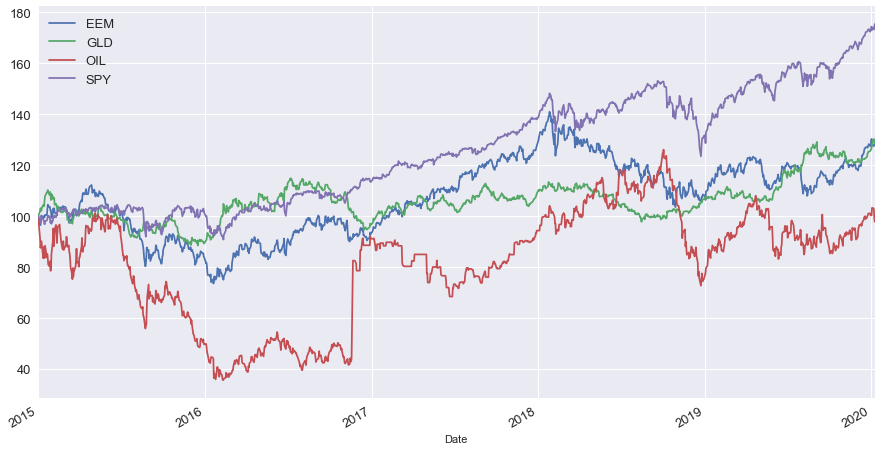

In [137]:
# Here I inspect & compare graphically the ETF's evolution
plt.style.use('seaborn')
normalized_df1.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [6]:
df = df.pct_change().dropna() 
#Creamos matriz de pesos para cada activo ("Equally weighted")
weights = []   #empty list
n_assets = len(assets) 

#Equally weighted portfolio
for i in range(n_assets):
    weights.append(1/n_assets)

w = np.array(weights)

In [139]:
w

array([0.25, 0.25, 0.25, 0.25])

In [140]:
df.head()

,OIL,GLD,SPY,EEM
Date,,,,
2015-01-02,-0.026316,0.004402,-0.000535,-0.013235
2015-01-05,-0.060606,0.015077,-0.018060,-0.017797
2015-01-06,-0.042720,0.011399,-0.009419,-0.004202
2015-01-07,0.019126,-0.005891,0.012461,0.021625
2015-01-08,0.010724,-0.004209,0.017745,0.017037


In [8]:
r = np.array(np.mean(df))   
C = np.cov(df.transpose()) #Estimate a covariance matrix, given data and weights.

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)
print("Matriz VarCov:", C)

Rendimiento esperado: [0.00043682 0.00023011 0.00048043 0.00027218]
Pesos activos: [0.25 0.25 0.25 0.25]
Matriz VarCov: [[ 1.11823090e-03  4.20444467e-06  6.67963582e-05  1.00433363e-04]
 [ 4.20444467e-06  6.26704584e-05 -1.13790689e-05  1.20097847e-06]
 [ 6.67963582e-05 -1.13790689e-05  7.16951357e-05  7.62505339e-05]
 [ 1.00433363e-04  1.20097847e-06  7.62505339e-05  1.40125478e-04]]


In [142]:
df.corr()

,OIL,GLD,SPY,EEM
OIL,1.000000,0.015882,0.236765,0.253719
GLD,0.015882,1.000000,-0.168470,0.012816
SPY,0.236765,-0.168470,1.000000,0.763371
EEM,0.253719,0.012816,0.763371,1.000000


In [143]:
df.std() ### Question: Why does the voltility change respect normalized prices?????

OIL    0.033440
GLD    0.007916
SPY    0.008446
EEM    0.011837
dtype: float64

In [9]:
def mu(w,r):
    '''Rendimiento portafolio anualizado'''
    return sum(w * r * 252) 


def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)


def sharpe(w):
    '''Sharpe ratio con rf de 4%'''
    rf = .04
    return (mu(w,r) - rf) / sigma(w,C)


def neg_sharpe(w):
    '''Sharpe ratio negativo'''
    return -sharpe(w)


def random_ports(n):
    '''Portafolio aleatorios'''
    means, stds = [],[]
    for i in range(n):
        rand_w = np.random.rand(len(assets))
        rand_w = rand_w / sum(rand_w)
        means.append(mu(rand_w, r))
        stds.append(sigma(rand_w,C))
    
    return means, stds

In [10]:
results_equal_portfolio = [('Return = ', mu(w,r)), ('Desviation = ' ,sigma(w,C)), ('Sharpe = ', sharpe(w))]
results_equal_portfolio

[('Return = ', 0.08943054284571003),
 ('Desviation = ', 0.17151334992373554),
 ('Sharpe = ', 0.28820230534643293)]

In [146]:
# Pero lo interesante, es calcular los pesos que mejor Sharpe ratio puedan lograr con esta 
# combinación de activos, esto es un problema de optimización que en Excel se resuelve con Solver, 
# para este caso usaremos scipy. Definiendo que ninguna variable puede ser negativa con un valor 
# máximo de 1 y que la suma de las variable debe ser igual a 1, así:

In [11]:
import scipy.optimize as optimize

In [12]:
def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })
bounds = ((0,1.0),)*n_assets


result = optimize.minimize(neg_sharpe, 
                      w, 
                      method='SLSQP', #difeferent methods avaiable
                      bounds= bounds,#((0, 1.0), (0, 1.0), (0, 1.0),(0,1.0)), #define the min and max weight for each asset
                      options={'disp': True},
                      constraints=my_constraints)
print(result)
optimal_w = result["x"]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.6525457615036487
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7
     fun: -0.6525457615036487
     jac: array([-0.28233003, -0.4183838 , -0.41748131,  0.25468504])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.78676516e-16, 2.94626776e-01, 7.05373224e-01, 2.58443498e-16])


Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

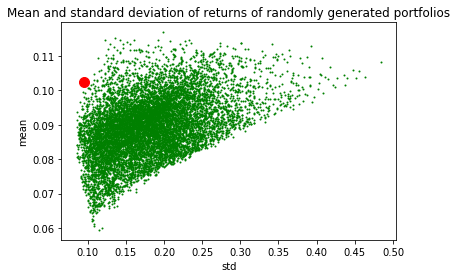

In [13]:
#Grafiquemos
n_portfolios = 10000
means, stds = random_ports(n_portfolios)

best_mu = mu(optimal_w, r)
best_sigma = sigma(optimal_w, C)
best_sharpe = sharpe(optimal_w)
plt.plot(stds, means, 'o',color='g', markersize=1)
plt.plot(best_sigma, best_mu, 'o', color='red' , markersize=10)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')


In [14]:
results_best_portfolio = [('Return = ', mu(optimal_w,r)), ('Desviation = ' ,sigma(optimal_w,C)), ('Sharpe = ', sharpe(optimal_w))]
results_best_portfolio

[('Return = ', 0.10248235647519484),
 ('Desviation = ', 0.09575168541623492),
 ('Sharpe = ', 0.6525457615036487)]

In [151]:
#A good way to estimate future returns is to fit an ARMA model 
# conditional mean return are time varying while unconditional are the average statit return
# at the same time, we are interested in conditional variance that we can modelate time-varying variance with 
#GARCH models

In [152]:
bounds = tuple((0, 1.0) for _ in range(n_assets))

In [153]:
bounds

((0, 1.0), (0, 1.0), (0, 1.0), (0, 1.0))

In [15]:
optimal_w

array([1.78676516e-16, 2.94626776e-01, 7.05373224e-01, 2.58443498e-16])